In [2]:
# import packages
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
movies_cleaned = pd.read_csv('movies_cleaned.csv')

/var/folders/mm/y8jmnzmd7xz1h127ngp83ddw0000gn/T/ipykernel_9852/3033993319.py:1: DtypeWarning: Columns (0,2,5,10,21) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_cleaned = pd.read_csv('movies_cleaned.csv')


genre

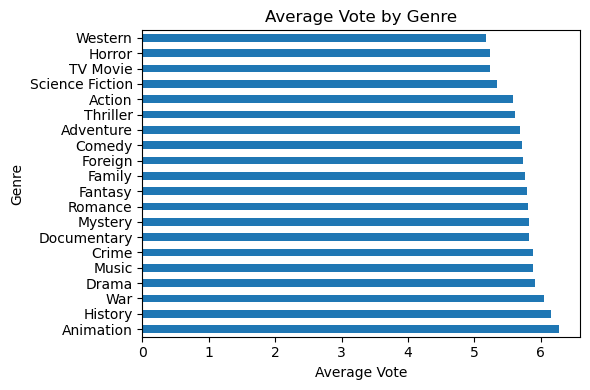

In [5]:
# get the genre columns
genre_columns = [col for col in movies_cleaned.columns if col.startswith('genre_')]

# get the genre average votes dictionary
genre_avg_votes = {
    genre.split('_')[1]: movies_cleaned[movies_cleaned[genre] == 1]['vote_average'].mean()
    for genre in genre_columns
}

# change the dictionary to dataframe
genre_avg_df = pd.DataFrame.from_dict(genre_avg_votes, orient='index', columns=['avg_vote'])
genre_avg_df = genre_avg_df.sort_values(by='avg_vote', ascending=False)

# graph
genre_avg_df.plot(kind='barh', figsize=(6, 4), legend=False)
plt.title('Average Vote by Genre')
plt.xlabel('Average Vote')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Release Year

In [6]:
# prepare the columns for release date/year
movies_cleaned['release_date'] = pd.to_datetime(movies_cleaned['release_date'], errors='coerce')
movies_cleaned['release_year'] = movies_cleaned['release_date'].dt.year

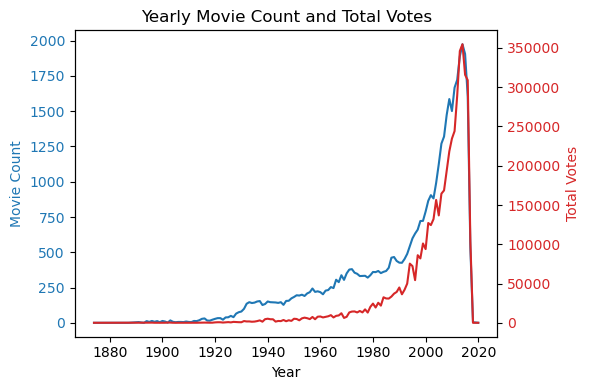

In [7]:
# prepare the data
year_count_df = pd.DataFrame.from_dict(dict(movies_cleaned.groupby('release_year').size()), orient='index', columns=['count'])
year_vote_count_df = movies_cleaned.groupby('release_year').agg({'vote_count': 'sum'})

# draw the graph
fig, ax1 = plt.subplots(figsize=(6, 4))

# left Axis：Movie Count
ax1.set_xlabel('Year')
ax1.set_ylabel('Movie Count', color = 'tab:blue')
ax1.plot(year_count_df.index, year_count_df.values, color = 'tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# right Axis: Movie Votes
ax2 = ax1.twinx()
ax2.set_ylabel('Total Votes', color = 'tab:red')
ax2.plot(year_vote_count_df.index, year_vote_count_df.values / 20, color = 'tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x * 20):}'))

# show the graph
plt.title('Yearly Movie Count and Total Votes')
plt.tight_layout()
plt.show()

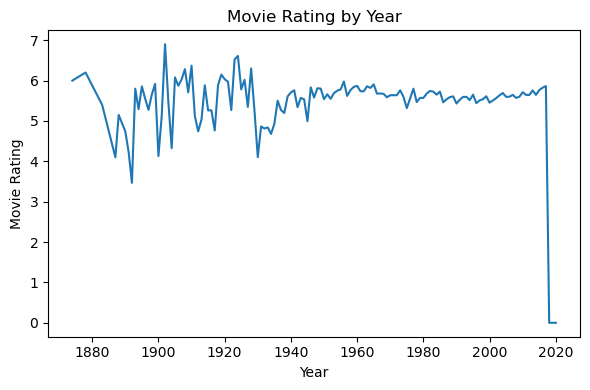

In [8]:
# movie rating by year
year_movie_rating_df = pd.DataFrame.from_dict(movies_cleaned.groupby('release_year')['vote_average'].mean().to_dict(), orient='index', columns=['count'])

# graph
year_movie_rating_df.plot(kind='line', figsize=(6, 4), legend=False)
plt.title('Movie Rating by Year')
plt.xlabel('Year')
plt.ylabel('Movie Rating')
plt.tight_layout()
plt.show()